## Coinopsy Scraped Data Cleaning

### Load text file to df

In [1]:
import pandas as pd

with open('coinopsy_raw.txt', 'r', encoding='utf-8') as f:
    contents = f.readlines()
    
coin_names = [value.strip() for index,value in enumerate(contents) if index % 2 == 0]
coin_details = [value.strip() for index,value in enumerate(contents) if index % 2 != 0]

df_coins = pd.DataFrame(columns=['Coin Name', 'Raw Details'])
df_coins['Coin Name'] = pd.Series(coin_names)
df_coins['Raw Details'] = pd.Series(coin_details)

df_coins

,Coin Name,Raw Details
0,Anita Pool,Abandoned or No Volume 2021 2014 Unknown
1,music,Abandoned or No Volume 2011 2011 Unknown
2,dickpenis,ICO Fail or Short Lived 2022 2013 lolbabal
3,ADAA,Scam or Other Issues 2021 2021 Unknown
4,yeet,Joke or No Purpose 2011 2011 Unknown
...,...,...
2404,BigLifeCoin,Abandoned or No Volume 2016 2017 Hwang jun ho
2405,BigONE Token,Abandoned or No Volume 2014 2018 Unknown
2406,BillaryCoin,Abandoned or No Volume 2016 2018 Unknown
2407,BitCent,Abandoned or No Volume 2015 2016 Unknown


In [3]:
df_coins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409 entries, 0 to 2408
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Coin Name    2409 non-null   object
 1   Raw Details  2409 non-null   object
dtypes: object(2)
memory usage: 37.8+ KB


### Rearrrange data

#### Status

In [4]:
# get category from raw data and return category as seen from coinopsy
def category_check(raw_string):
    
    # categories from coinopsy 
    categories = ['Abandoned or No Volume', 'Joke or No Purpose', 'Scam or Other Issues', 'ICO Fail or Short Lived']
    for category in categories:
        if category in raw_string:
            return category
        
        
# get category from raw details  
df_coins.insert(1, 'Status', df_coins['Raw Details'].apply(lambda x: category_check(x)))
df_coins.head()

,Coin Name,Status,Raw Details
0,Anita Pool,Abandoned or No Volume,Abandoned or No Volume 2021 2014 Unknown
1,music,Abandoned or No Volume,Abandoned or No Volume 2011 2011 Unknown
2,dickpenis,ICO Fail or Short Lived,ICO Fail or Short Lived 2022 2013 lolbabal
3,ADAA,Scam or Other Issues,Scam or Other Issues 2021 2021 Unknown
4,yeet,Joke or No Purpose,Joke or No Purpose 2011 2011 Unknown


In [5]:
df_coins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409 entries, 0 to 2408
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Coin Name    2409 non-null   object
 1   Status       2381 non-null   object
 2   Raw Details  2409 non-null   object
dtypes: object(3)
memory usage: 56.6+ KB


In [6]:
# check reason for nulls
df_coins[df_coins['Status'].isnull()]

,Coin Name,Status,Raw Details
992,Pesetacoin,None,Limited Volume/Limited Exchanges 2017 2019 Unk...
998,Kappi Network,None,"Wallet Issues, Low Volume 2018 2020 Daniel Jon..."
1312,ShipChain,None,Limited Volume/Limited Exchanges 2018 2018 Joh...
1852,BitStone,None,scam 2015 2016 Unknown
1854,Bitpark Coin,None,ico 2016 2018 Hidenari Aizawa
1856,BitTokens,None,ico 2016 2018 Unknown
1857,BitStake,None,scam 2015 2015 Unknown
1859,BitMoon,None,ico 2017 2018 Unknown
1860,BitMoney,None,scam 2018 2019 Possibly Warren Bird
1861,Bitmiles,None,scam 2014 2015 Rynaldo S


In [7]:
# replace shortened status in raw details to values similar to original categories
dict_replace = {'Failed':'Fail', 'scam':'Scam or Other Issues','ico':'ICO Fail or Short Lived'}

for key in dict_replace.keys():
    df_coins['Raw Details'][df_coins['Status'].isnull()] = df_coins[df_coins['Status'].isnull()]['Raw Details'].apply(lambda x:x.replace(key, dict_replace[key]))
    
df_coins[df_coins['Status'].isnull()]

,Coin Name,Status,Raw Details
992,Pesetacoin,None,Limited Volume/Limited Exchanges 2017 2019 Unk...
998,Kappi Network,None,"Wallet Issues, Low Volume 2018 2020 Daniel Jon..."
1312,ShipChain,None,Limited Volume/Limited Exchanges 2018 2018 Joh...
1852,BitStone,None,Scam or Other Issues 2015 2016 Unknown
1854,Bitpark Coin,None,ICO Fail or Short Lived 2016 2018 Hidenari Aizawa
1856,BitTokens,None,ICO Fail or Short Lived 2016 2018 Unknown
1857,BitStake,None,Scam or Other Issues 2015 2015 Unknown
1859,BitMoon,None,ICO Fail or Short Lived 2017 2018 Unknown
1860,BitMoney,None,Scam or Other Issues 2018 2019 Possibly Warren...
1861,Bitmiles,None,Scam or Other Issues 2014 2015 Rynaldo S


In [8]:
df_coins['Status'][df_coins['Status'].isnull()] = df_coins['Raw Details'][df_coins['Status'].isnull()].apply(lambda x: category_check(x))

df_coins[df_coins['Status'].isnull()]

,Coin Name,Status,Raw Details
992,Pesetacoin,None,Limited Volume/Limited Exchanges 2017 2019 Unk...
998,Kappi Network,None,"Wallet Issues, Low Volume 2018 2020 Daniel Jon..."
1312,ShipChain,None,Limited Volume/Limited Exchanges 2018 2018 Joh...


In [9]:
df_coins['Status'][992, 1312] = 'Limited Volume/Limited Exchanges'
df_coins['Status'][998] = 'Wallet Issues, Low Volume'

df_coins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409 entries, 0 to 2408
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Coin Name    2409 non-null   object
 1   Status       2409 non-null   object
 2   Raw Details  2409 non-null   object
dtypes: object(3)
memory usage: 56.6+ KB


In [10]:
df_coins['Raw Details'] = [e.replace(k, '') for e, k in zip(df_coins['Raw Details'].astype('str'), df_coins['Status'].astype('str'))]
df_coins

,Coin Name,Status,Raw Details
0,Anita Pool,Abandoned or No Volume,2021 2014 Unknown
1,music,Abandoned or No Volume,2011 2011 Unknown
2,dickpenis,ICO Fail or Short Lived,2022 2013 lolbabal
3,ADAA,Scam or Other Issues,2021 2021 Unknown
4,yeet,Joke or No Purpose,2011 2011 Unknown
...,...,...,...
2404,BigLifeCoin,Abandoned or No Volume,2016 2017 Hwang jun ho
2405,BigONE Token,Abandoned or No Volume,2014 2018 Unknown
2406,BillaryCoin,Abandoned or No Volume,2016 2018 Unknown
2407,BitCent,Abandoned or No Volume,2015 2016 Unknown


#### Start Year, End Year

In [11]:
df_coins['Start Year'] = df_coins['Raw Details'].apply(lambda x: x.split()[0])
df_coins['End Year'] = df_coins['Raw Details'].apply(lambda x: x.split()[1])

df_coins.drop(columns=['Raw Details'], inplace=True)

In [12]:
df_coins

,Coin Name,Status,Start Year,End Year
0,Anita Pool,Abandoned or No Volume,2021,2014
1,music,Abandoned or No Volume,2011,2011
2,dickpenis,ICO Fail or Short Lived,2022,2013
3,ADAA,Scam or Other Issues,2021,2021
4,yeet,Joke or No Purpose,2011,2011
...,...,...,...,...
2404,BigLifeCoin,Abandoned or No Volume,2016,2017
2405,BigONE Token,Abandoned or No Volume,2014,2018
2406,BillaryCoin,Abandoned or No Volume,2016,2018
2407,BitCent,Abandoned or No Volume,2015,2016


### Note:

According to coinopsy, coins with End Year values listed as 'current' are coins that can be still traded but listed as dead due to low volume and very small market cap (volume < 1000 usd per day and market cap in thousands). These coins, while very dangerous, will be removed from the list as there are similar coins still listed in coinmarketcap.

In [13]:
df_coins['Start Year'].value_counts()

2017       706
2014       607
2018       409
2015       247
2016       222
2013        84
2021        44
2019        40
2020        23
2011        19
2012         5
Unknown      2
2022         1
Name: Start Year, dtype: int64

In [14]:
df_coins['End Year'].value_counts()

2018         751
2019         331
2014         308
2017         291
2015         256
2016         182
2020         105
2021          75
Current       72
2011          18
2013          10
2022           4
2017/2018      2
2012           1
Curren         1
Swap           1
2013?          1
Name: End Year, dtype: int64

In [15]:
df_coins[df_coins['Start Year'] == 'Unknown']

,Coin Name,Status,Start Year,End Year
1824,Braincoin,Abandoned or No Volume,Unknown,2017
1829,Caesarion,Abandoned or No Volume,Unknown,2017


In [16]:
# Braincoin data drom coinmarketcap
df_coins['Start Year'][1824] = 2016

# Caesarion data from coinmarketcap
df_coins['Start Year'][1829] = 2016

In [17]:
df_coins[df_coins['End Year'] == '2017/2018']

,Coin Name,Status,Start Year,End Year
1868,BFX Coin,Abandoned or No Volume,2016,2017/2018
2120,MetalCoin,Abandoned or No Volume,2014,2017/2018


In [18]:
# replace 2017/2018 with 2018
df_coins.loc[df_coins[df_coins['End Year'] == '2017/2018'].index, 'End Year'] = 2018

# replace 2013? with 2013
df_coins.loc[df_coins[df_coins['End Year'] == '2013?'].index, 'End Year'] = 2013

In [19]:
# df_coins['Start Year'] = df_coins['Start Year'].astype('int32')
# df_coins['End Year'] = df_coins['End Year'].astype('int32')
df_coins['Start Year'] = pd.to_numeric(df_coins['Start Year'], errors='coerce')
df_coins['End Year'] = pd.to_numeric(df_coins['End Year'], errors='coerce')
df_coins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409 entries, 0 to 2408
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Coin Name   2409 non-null   object 
 1   Status      2409 non-null   object 
 2   Start Year  2409 non-null   int64  
 3   End Year    2335 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 75.4+ KB


In [20]:
df_coins.dropna(inplace=True)
df_coins['End Year'] = df_coins['End Year'].astype('int')

In [21]:
df_coins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2408
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Coin Name   2335 non-null   object
 1   Status      2335 non-null   object
 2   Start Year  2335 non-null   int64 
 3   End Year    2335 non-null   int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 82.1+ KB


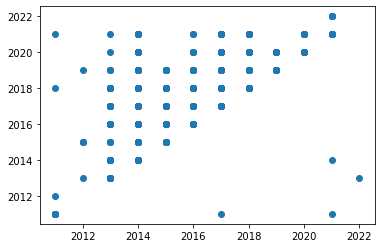

In [22]:
import matplotlib.pyplot as plt

plt.scatter(x=df_coins['Start Year'], y=df_coins['End Year'])

In [25]:
# inspect rows where end year < start year
err = df_coins[df_coins['Start Year'] > df_coins['End Year']].index

# swap values
df_coins.loc[err, ['Start Year', 'End Year']] = (df_coins.loc[err, ['End Year', 'Start Year']].values)

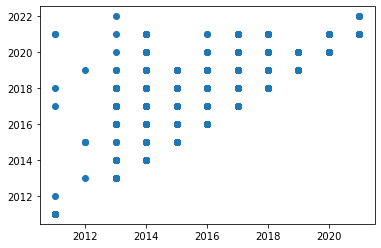

In [26]:
plt.scatter(x=df_coins['Start Year'], y=df_coins['End Year'])

In [27]:
df_coins.to_csv('coinopsy_cleaned.csv')